- 데이터 수집 경로: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
- 이미지는 train 폴더와 test 폴더로 구분되고, 사과, 바나나, 오렌지 과일을 신선, 썩은 과일로 분류되어 있다.
- 이 중 사과 폴더를 이용해서 모델에 사용할 데이터셋을 만든다.
- 이미지 인식에 좋은 성능을 보이는 신경망 모델로 합성곱 신경망을 사용한다.


## 절차 ##


- 합성곱 신경망으로 이미지의 특징을 추출한다.
- 사전 훈련된 모델인 VGG16 모델이나 Inception v3 모델을 이용해 특징을 추출한다.
- 추출된 특징값을 완전연결층의 입력으로 받아 분류 모델을 설계한다.
- 신선한 사과(freshapples)와 썩은 사과(rottenapples)인 2개로 분류하므로 출력층 2개의 노드값 중 큰 값으로 예측한다.
- 예를 들어 출력층 결과가 신선한 사과로 예측하는 확률값이 0.3, 썩은 사과로 예측한 확률값이 0.7이라면 큰 값인 썩은 사과로 예측한다.
- https://mengu.tistory.com/23


## 합성곱 신경망 ##


- 합성곱 신경망(Convolution Neural Network)는 이미지, 비디오 인식에 좋은 성능을 보여주는 딥러닝 기술 중 하나다.
- 구조는 크게 합성곱층, 풀링층, 완전연결층으로 구성된다.
- 합성곱층에서는 이미지 특징을 추출하고, 풀링층에서는 추출된 특징 중에 중요한 부분만 추출해 데이터의 크기를 줄이는 역할을 수행한다.
- 이러한 과정을 반복하면 큰 크기의 이미지 데이터에서 핵심적인 특징만 추출하게 되므로 분류하는데 큰 도움을 준다.
- 완전 연결층에서는 이미지의 분류를 수행하는 역할을 한다.
- 합성곱층과 풀링층으로 추출된 특징값들을 입력으로 받이 클래스 분류를 수행한다.
- 이때 이미지 특징값은 완전연결층의 입력층으로 들어와 학습시켜 출력층에서 확률값 중 가장 큰 확률값을 분류로 사용한다.


## 사전 훈련된 모델 ##


- 사전 훈련된 모델은 대규모 이미지 분류 문제를 위해 대량의 데이터셋으로 미리 훈련되어 저장된 신경망이다.
- 사전 훈련된 합성곱 신경망의 훈련에 사용한 원본 데이터셋이 충분히 크다면, 일반적인 이미지 분류 모델로 사용될 수 있다.
- 사전 훈련된 합성곱 신경망들은 이미지 인식대회(ILSVRC)의 대형 이미지 데이터베이스에서 대량의 원본 데이터셋을 이용해 훈련되어 우승한 모델들을 많이 사용한다.


## 전이 학습 ##


- 전이학습은 어떤 목적을 이루기 위해 학습된 모델을 다른 작업에 이용하는 것을 말한다.
- 일반적으로 합성곱 신경망으로 딥러닝 모델을 만들려면 많은 양의 데이터가 필요하지만 현실적으로 충분히 큰 데이터셋을 얻는 것은 쉽지 않다.
- 사전 훈련된 신경망 모델의 전체 또는 일부를 가져와 해결하려고 하는 과제에 맞게 최적화해서 사용할 수 있다.
- 예를 들어 썩은 사과를 분류하는 경우, 사전 훈련된 이미지 분류 모델을 사용하여 이미지의 특징을 추출할 수 있다.
- 사전 훈련된 분류 모델은 일반적으로 ImageNet 데이터셋에서 훈련된다.
- 여기서는 다양한 종류의 이미지로 구성돼 있기 때문에, 사전 훈련된 이미지 분류 모델은 다양한 이미지의 특징을 추출할 수 있다.


In [1]:
# 드라이브 접근 
# 작업 드라이브 이동 
from PIL import Image
import os

folder_path = './fruit_data'
image_extensions = {'png'}

## ImageDataGenerator ##


- 이미지를 읽고, 전처리하고, 증강하여 모델학습에 사용


- 사용 파라미터
 - rescale: 이미지 픽셀값을 정규화함. 일반적으로 0 ~ 1사이 정규화 값은 1./255
 - rotate_range: 이미지를 지정된 각도 범위 내에서 무작위로 회전. 20으로 설정하면 -20 ~ 20도 사이로 회전
 - width_shift_range, height_shift_range: 이미지를 가로 및 세로로 이동시킴. 값은 0 ~ 1사이의 비율
 - zoom_range: 이미지를 확대 또는 축소. 0.2로 설정하면 이미지가 0.8배에서 1.2배까지 무작위로 확대축소
 - horizontal_flip, vertical_flip: 이미지를 수평 또는 수직으로 뒤집음


In [2]:
# 훈련 데이터 처리 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    directory=os.path.join(folder_path, 'train'), # train 폴더에서 이미지 호출 후 전처리 적용 
    target_size = (64, 64), # 64 * 64
    batch_size = 32, # 한번에 32개 이미지 처리 
    shuffle=True, # 무작cl위 선택 
    class_mode='categorical' #여러 이미지를 분류하기 떄문에 다중 클래스 모드 사용 
)

Found 400 images belonging to 2 classes.


In [3]:


test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_set = test_datagen.flow_from_directory(
    directory=os.path.join(folder_path, 'test'),
    target_size=(64, 64),  # 64 * 64
    batch_size=32,  # 한번에 32개 이미지 처리
    shuffle=False,  # 무작위 선택
    class_mode="categorical",  # 여러 이미지를 분류하기 떄문에 다중 클래스 모드 사용
)


Found 40 images belonging to 2 classes.


In [4]:
# 합성곱 신경망 모델 생성 
# 사전 훈련된 합성곱 신경망 모델인 VGG16을 불러 이미지 특징을 추출 
# include_top= False: 완전 연결층을 제외한 합성곱층, 풀링층만 수행해 특징 추출
# weight = 'imagenet': 모델에 imagenet 데이터셋으로 사전 훈련된 가중치 사용 

from keras.applications.vgg16 import VGG16

# vgg 모델 생성 

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
vgg.summary()

# vgg 모델의 모든 층의 가중치가 중첩해서 업데이트 되지 않도록 함 
# 모든 층의 가중치가 업데이트 되지 않도록 해서 모델 학습시 불필요한 계산 줄임 
for layer in vgg.layers:
    layer.trainable = False

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# vgg16 모델로 추출한 특징 값을 입력층으로 입력 받아 완전 연결층 신경망 모델 설계
#케라스 완전 연결층 구성 클래스 로드 
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [6]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [7]:
# 신경망 분류 모델에 대한 손실 함수와 최적화 함수 설정 
# 클래스 모드가 categorical이면 손실 함수값은 categorical_crosssentropy 지정 
# 가중치를 최적화하는 값으로 adam 사용 
# 측정 지표는 accuracy 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 훈련 데이터(training_set)를 이용해 신경망 모델 학습 10 회 

history = model.fit(training_set, epochs=10)

C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.6480 - loss: 0.6446
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.8614 - loss: 0.3534
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.8642 - loss: 0.2853
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.9081 - loss: 0.2282
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.9509 - loss: 0.1663
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step - accuracy: 0.9579 - loss: 0.1567
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.9499 - loss: 0.1455
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - accuracy: 0.9614 - loss: 0.1391
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 487ms/step - accuracy: 0.9621 - loss: 0.1262
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 450ms/step - accuracy: 0.9845 - loss: 0.0885


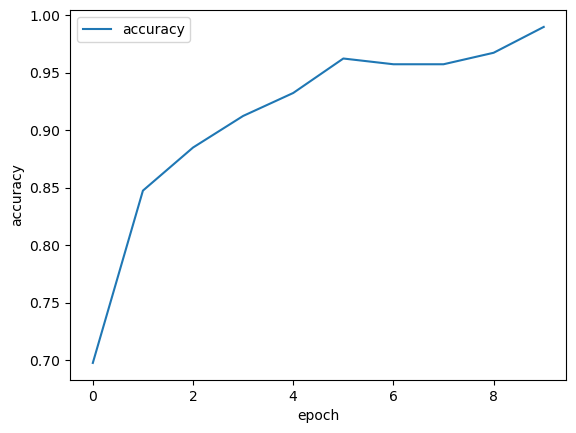

In [9]:
import matplotlib.pyplot as plt

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.legend()
plt.show()


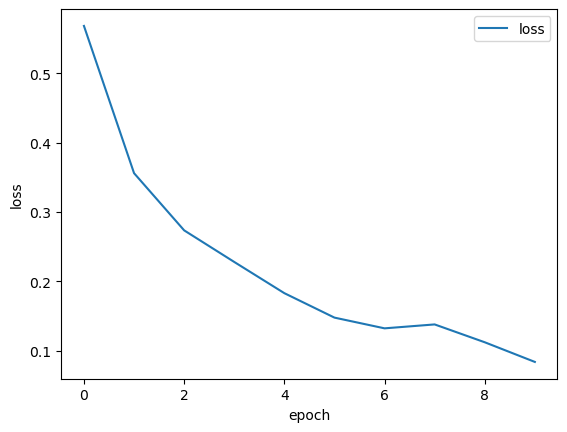

In [10]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()


In [11]:
model.evaluate(test_set)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9458 - loss: 0.1353


[0.12644009292125702, 0.949999988079071]

In [12]:
test_set.class_indices


{'freshapples': 0, 'rottenapples': 1}

In [13]:
predictions = model.predict(test_set)
predictions


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step


array([[8.82937014e-01, 1.17062934e-01],
       [9.97767687e-01, 2.23233714e-03],
       [9.99353468e-01, 6.46538159e-04],
       [9.98087049e-01, 1.91303832e-03],
       [7.75086820e-01, 2.24913165e-01],
       [9.99019504e-01, 9.80489771e-04],
       [9.99840140e-01, 1.59889067e-04],
       [9.72815096e-01, 2.71848813e-02],
       [9.86322284e-01, 1.36776799e-02],
       [8.83039832e-01, 1.16960190e-01],
       [8.60170245e-01, 1.39829755e-01],
       [9.99161005e-01, 8.38958425e-04],
       [9.97087657e-01, 2.91232532e-03],
       [9.99029279e-01, 9.70791152e-04],
       [9.97119546e-01, 2.88052810e-03],
       [1.63302690e-01, 8.36697280e-01],
       [8.57023180e-01, 1.42976850e-01],
       [8.82604241e-01, 1.17395759e-01],
       [9.87785935e-01, 1.22140273e-02],
       [2.70252407e-01, 7.29747593e-01],
       [6.97209639e-03, 9.93027866e-01],
       [1.58594385e-01, 8.41405630e-01],
       [7.02373451e-03, 9.92976308e-01],
       [1.63696371e-02, 9.83630359e-01],
       [2.148691

In [14]:
# 예측 값이 데이터의 어떤 클래스에 해당되는지 출력
import numpy as np

print(np.argmax(predictions, axis=1))  # 앞에 숫자가 0.8 -> 0, 뒤의 숫자가 0.8 -> 1


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


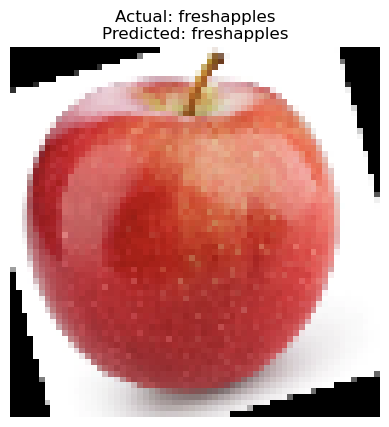

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# a = [1, 2, 3]
# next(a): 1
# next(a): 2

# 테스트 데이터셋에서 임의의 배치 가져오기
batch_images, batch_labels = next(test_set)  # 첫 번째 배치 가져오기
index = np.random.randint(0, len(batch_images))  # 배치에서 임의의 인덱스 선택

# 선택된 이미지와 레이블
img = batch_images[index]  # 배치 내 이미지 선택
true_label_index = np.argmax(batch_labels[index])  # 실제 레이블 인덱스
class_indices = {v: k for k, v in test_set.class_indices.items()}  # 클래스 인덱스 매핑
true_label = class_indices[true_label_index]  # 실제 클래스 이름

# 이미지 데이터 및 예측 결과
prediction = model.predict(np.expand_dims(img, axis=0))  # 모델 예측
predicted_class_index = np.argmax(prediction)  # 예측된 클래스 인덱스
predicted_class = class_indices[predicted_class_index]  # 예측된 클래스 이름

# 이미지 시각화
plt.imshow(img)
plt.title(f"Actual: {true_label}\nPredicted: {predicted_class}")
plt.axis("off")
plt.show()


In [16]:
print(np.__version__)


1.26.4


In [ ]:
# 